In [1]:
import os
import pandas as pd
import json
import mne
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [6]:
sample_data_folder = '../ds003703-download'
#sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, #'MEG', 'sample',
                                    '/sub-a68d5xp5-meg-sub-a68d5xp5_task-listeningToSpeech_run-01_meg.fif'
                                    #'sample_audvis_filt-0-40_raw.fif'
                                   )
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /Users/jaime/Library/Mobile Documents/com~apple~CloudDocs/Hills/Danny Meyers/Sequencial dataset/MEG-EEG/OpenNeuro/sub-a68d5xp5-meg-sub-a68d5xp5_task-listeningToSpeech_run-01_meg.fif...
    Read a total of 8 projection items:
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
    Range : 931000 ... 1953999 =    931.000 ...  1953.999 secs
Ready.


In [7]:
print(raw)
print(raw.info)

<Raw | sub-a68d5xp5-meg-sub-a68d5xp5_task-listeningToSpeech_run-01_meg.fif, 314 x 1023000 (1023.0 s), ~5.3 MB, data not loaded>
<Info | 24 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 acq_stim: 7 800.000000 2000.000000
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 GRAD, 102 MAG, 2 EOG, 1 ECG, 1 MISC, 4 STIM
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_head_t: MEG device -> head transform
 dig: 162 items (3 Cardinal, 4 HPI, 155 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 1924-12-31 15:57:12 UTC
 meas_id: 4 items (dict)
 nchan: 314
 proj_id: 1 item (ndarray)
 proj_name: mne_anonymize
 projs: generated with autossp-1.0.1: off, generated wi

In [8]:
raw.info

<Info | 24 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 acq_stim: 7 800.000000 2000.000000
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 GRAD, 102 MAG, 2 EOG, 1 ECG, 1 MISC, 4 STIM
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_head_t: MEG device -> head transform
 dig: 162 items (3 Cardinal, 4 HPI, 155 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 1924-12-31 15:57:12 UTC
 meas_id: 4 items (dict)
 nchan: 314
 proj_id: 1 item (ndarray)
 proj_name: mne_anonymize
 projs: generated with autossp-1.0.1: off, generated with autossp-1.0.1: ...
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


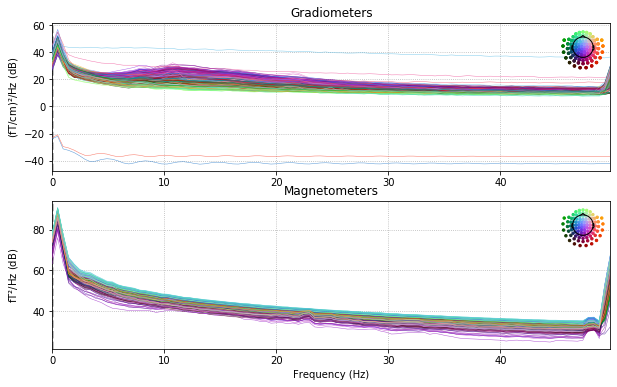

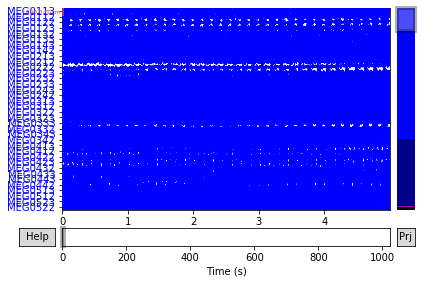

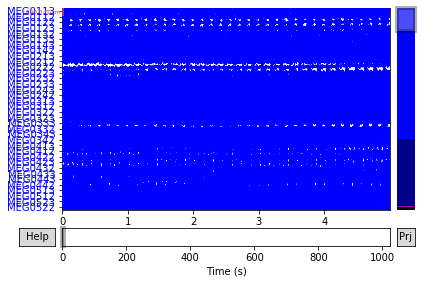

In [9]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=36)

Fitting ICA to data using 306 channels (please be patient, this may take a while)
Selecting by number: 20 components


/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
<ipython-input-10-aa77dd0b6761>:3: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (82) and smallest (8e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 19
  ica.fit(raw)


Fitting ICA took 7440.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
511 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
511 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


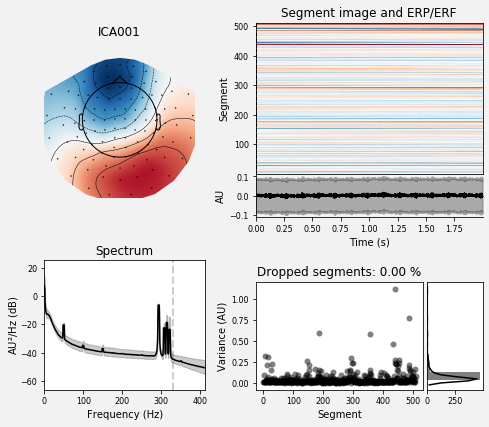

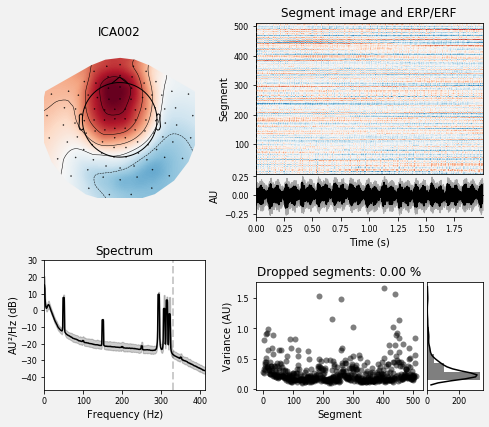

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [10]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [7]:
raw.ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


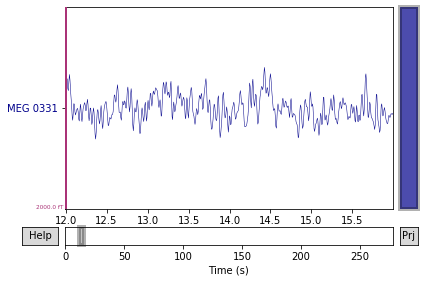

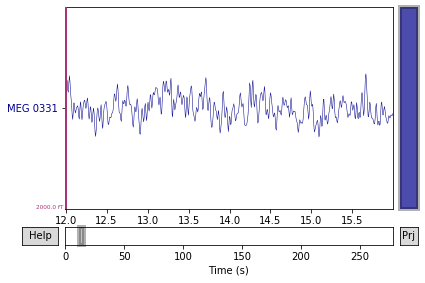

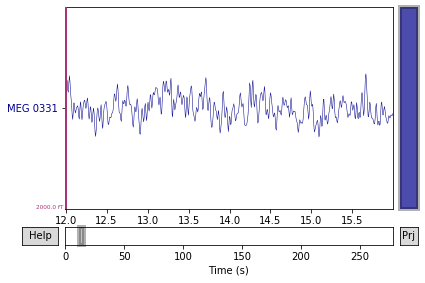

In [8]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = [#'MEG 0111', 
       #'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       #'MEG 0311', 'MEG 0321', 
   'MEG 0331', 
    #'MEG 1511', 'MEG 1521', 'MEG 1531'

       
#'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 
#    'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010',
#      'EEG 011', 'EEG 012'
      ]
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

In [21]:
# export chanels into raw csv
path = '/Users/jaime/Library/Mobile Documents/com~apple~CloudDocs/Hills/Danny Meyers/Sequencial dataset/MEG-EEG/arrays_tests_2/'

# MEG
#chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
#       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531']

# EEG
chs = [ 'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 
    'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010',
      'EEG 011', 'EEG 012']


for ch in chs:
    a = str(ch)
    m = np.array(raw[a][0])
    np.savetxt(path + "sample_audvis_filt-0-40_raw_chanel_" + a + "_array_0.csv", m, delimiter=",")


In [ ]:
# OLD CODE

In [82]:
# get first array and store it as m
# array No. 0 is the actual values, array No. 1 is the same for every sensor

# MEG
#m = np.array(raw['MEG 0111'][0])
#m = np.array(raw['MEG 0331'][0])
# EEG
m = np.array(raw['EEG 008'][0])

print('Array size:', np.shape(m))
print(m)

Array size: (1, 41700)
[[1.13959189e-05 1.86282366e-05 2.69901694e-05 ... 1.30548437e-05
  1.11835983e-05 1.88168240e-05]]


In [77]:
# get first array and store it as m
#m = pd.DataFrame(raw['MEG 0111'][1])
#print(m.shape)
#m.head()

In [78]:
path = '/Users/jaime/Library/Mobile Documents/com~apple~CloudDocs/Hills/Danny Meyers/Sequencial dataset/EEG/arrays_tests/'
#np.savetxt(path + "sample_audvis_filt-0-40_raw_chanel_MEG_0111_array_0.csv", m, delimiter=",")
#np.savetxt(path + "sample_audvis_filt-0-40_raw_chanel_MEG_0331_array_0.csv", m, delimiter=",")
#np.savetxt(path + "sample_audvis_filt-0-40_raw_chanel_EEG_004_array_0.csv", m, delimiter=",")
np.savetxt(path + "sample_audvis_filt-0-40_raw_chanel_EEG_008_array_0.csv", m, delimiter=",")
